In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_json("dataset.json")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   GÉNERO                    3000 non-null   object
 1   EDAD                      3000 non-null   int64 
 2   TABAQUISMO                3000 non-null   int64 
 3   DEDOSAMARILLOS            3000 non-null   int64 
 4   ANSIEDAD                  3000 non-null   int64 
 5   PRESI_DE_PERER            3000 non-null   int64 
 6   ENFERMEDAD_CRÓNICA        3000 non-null   int64 
 7   FATIGA                    3000 non-null   int64 
 8   ALERGIA                   3000 non-null   int64 
 9   SIBILANCIA                3000 non-null   int64 
 10  CONSUMO_DE_ALCOHOL        3000 non-null   int64 
 11  TOSER                     3000 non-null   int64 
 12  DIFICULTAD_PARA_RESPIRAR  3000 non-null   int64 
 13  DIFICULTAD_DE_REVOLCARSE  3000 non-null   int64 
 14  DOLOR_EN_EL_PECHO       

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
EDAD,3000.0,55.169000,14.723746,30.0,42.0,55.0,68.0,80.0
TABAQUISMO,3000.0,1.491000,0.500002,1.0,1.0,1.0,2.0,2.0
DEDOSAMARILLOS,3000.0,1.514000,0.499887,1.0,1.0,2.0,2.0,2.0
ANSIEDAD,3000.0,1.494000,0.500047,1.0,1.0,1.0,2.0,2.0
PRESI_DE_PERER,3000.0,1.499000,0.500082,1.0,1.0,1.0,2.0,2.0
ENFERMEDAD_CRÓNICA,3000.0,1.509667,0.499990,1.0,1.0,2.0,2.0,2.0
FATIGA,3000.0,1.489667,0.499977,1.0,1.0,1.0,2.0,2.0
ALERGIA,3000.0,1.506667,0.500039,1.0,1.0,2.0,2.0,2.0
SIBILANCIA,3000.0,1.497333,0.500076,1.0,1.0,1.0,2.0,2.0
CONSUMO_DE_ALCOHOL,3000.0,1.491333,0.500008,1.0,1.0,1.0,2.0,2.0


In [6]:
num_duplicates = df.duplicated().sum()

print(f'Número de registros duplicados: {num_duplicates}')

Número de registros duplicados: 2


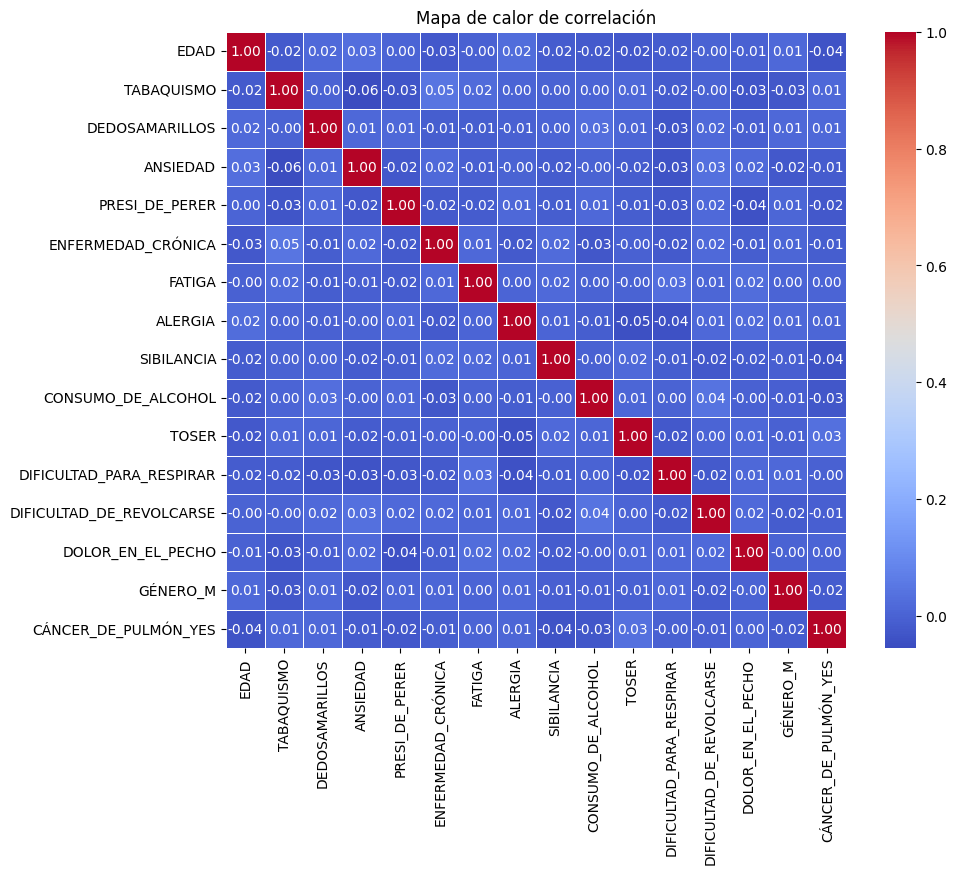

In [7]:
df_encoded = pd.get_dummies(df, drop_first=True)

corr_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa de calor de correlación')
plt.show()

In [8]:
df.head()

,GÉNERO,EDAD,TABAQUISMO,DEDOSAMARILLOS,ANSIEDAD,PRESI_DE_PERER,ENFERMEDAD_CRÓNICA,FATIGA,ALERGIA,SIBILANCIA,CONSUMO_DE_ALCOHOL,TOSER,DIFICULTAD_PARA_RESPIRAR,DIFICULTAD_DE_REVOLCARSE,DOLOR_EN_EL_PECHO,CÁNCER_DE_PULMÓN
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


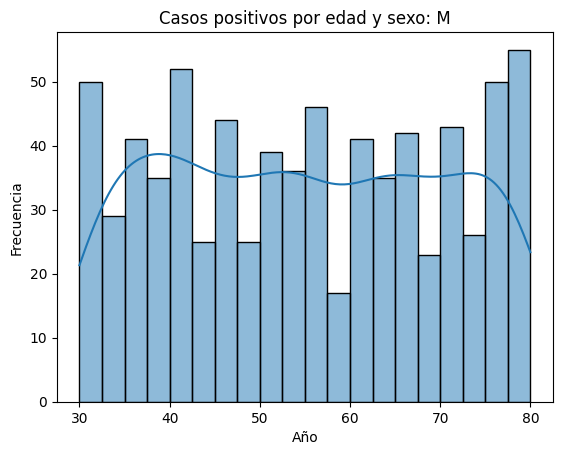

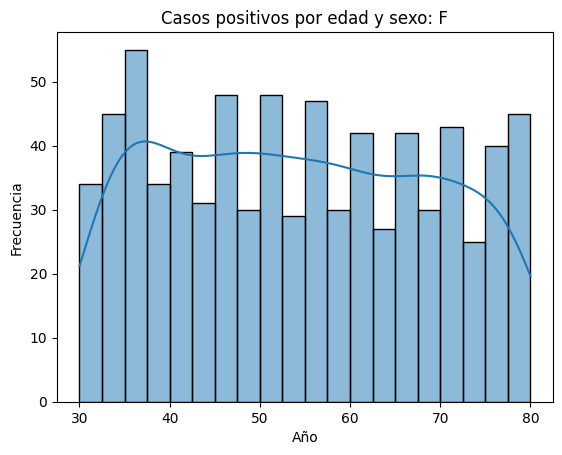

In [9]:

for x in df['GÉNERO'].unique():
    plt.figure() 
    sns.histplot(df.loc[(df['GÉNERO'] == x) & (df['CÁNCER_DE_PULMÓN'] == 'YES')]['EDAD'], kde=True, bins=20)
    plt.title(f'Casos positivos por edad y sexo: {x}')
    plt.xlabel('Año')
    plt.ylabel('Frecuencia')
    plt.show()  

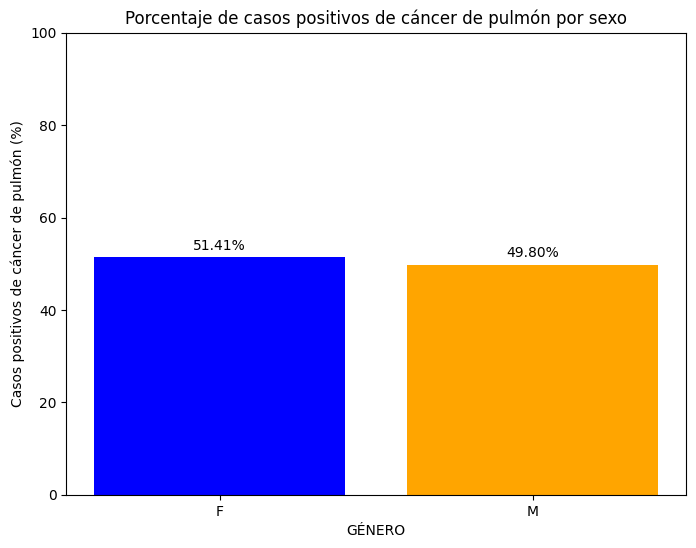

In [10]:
positive_counts = df[df['CÁNCER_DE_PULMÓN'] == 'YES']['GÉNERO'].value_counts()
total_counts = df['GÉNERO'].value_counts()
positive_percent = (positive_counts / total_counts) * 100

#
plt.figure(figsize=(8, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color=['blue', 'orange'])

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom')

plt.title('Porcentaje de casos positivos de cáncer de pulmón por sexo')
plt.xlabel('GÉNERO')
plt.ylabel('Casos positivos de cáncer de pulmón (%)')
plt.ylim(0, 100) 
plt.show()

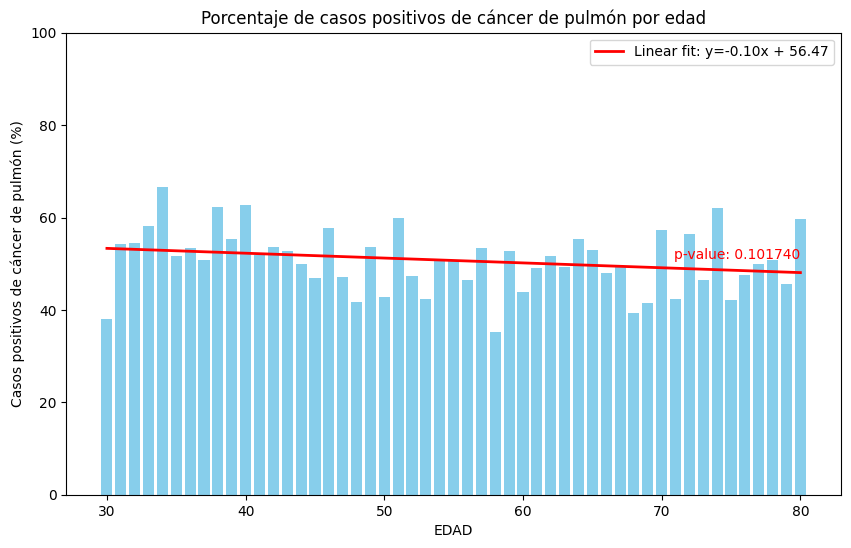

In [11]:
from scipy.stats import linregress

positive_counts = df[df['CÁNCER_DE_PULMÓN'] == 'YES']['EDAD'].value_counts()
total_counts = df['EDAD'].value_counts()
positive_percent = (positive_counts / total_counts) * 100

positive_percent = positive_percent.sort_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(positive_percent.index, positive_percent.values, color='skyblue')

x = positive_percent.index.values
y = positive_percent.values
slope, intercept, r_value, p_value, std_err = linregress(x, y)
y_fit = slope * x + intercept

plt.plot(x, y_fit, color='red', linewidth=2, label=f'Linear fit: y={slope:.2f}x + {intercept:.2f}')

plt.text(max(x), max(y_fit), f'p-value: {p_value:.6f}', ha='right', va='top', color='red')

plt.title('Porcentaje de casos positivos de cáncer de pulmón por edad')
plt.xlabel('EDAD')
plt.ylabel('Casos positivos de cáncer de pulmón (%)')
plt.ylim(0, 100)  
plt.legend()

plt.show()

In [1]:
#importaciones 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import json
import matplotlib.pyplot as plt
#leer el archivo json 
with open('dataset.json', encoding='utf-8') as file:
    data = json.load(file)

df = pd.DataFrame(data)
#Mapeo de valores categóricos a valores numéricos
df['GÉNERO'] = df['GÉNERO'].map({'M': 1, 'F': 0})
df['CÁNCER_DE_PULMÓN'] = df['CÁNCER_DE_PULMÓN'].map({'YES': 1, 'NO': 0})
#Separación de características y objetivo:
features = df.drop(columns=['CÁNCER_DE_PULMÓN'])
target = df['CÁNCER_DE_PULMÓN']
#División de los datos en conjuntos de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=1)
#Entrenamiento del modelo de árbol de decisión:
clf = DecisionTreeClassifier(max_depth=5)

clf = clf.fit(X_train, y_train)
#Predicción con el modelo entrenado:
y_pred = clf.predict(X_test)
#Evalucion de modelo 
print("Precisión:", metrics.accuracy_score(y_test, y_pred))
#Visualización del árbol de decisión:

plt.figure(figsize=(120, 120)) 
plot_tree(clf, feature_names=features.columns, class_names=['NO', 'YES'], filled=True, rounded=True, fontsize=20)
plt.show()

Precisión: 0.5111111111111111
